In [ ]:
!rm -rf /usr/local/lib/python3.11/dist-packages/~orch*
!rm -rf /usr/local/lib/python3.11/dist-packages/~equests*

In [ ]:
# install huggingface hub using pip

%pip install transformers torch sentencepiece accelerate tqdm

# !pip install --force-reinstall numpy==1.26.4
# !pip install --force-reinstall torch
# !pip install --force-reinstall transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
%pip check

ipython 7.34.0 requires jedi, which is not installed.


In [ ]:
from transformers import pipeline
# filter warnings created by using pipeline with Python 3.10
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pipeToxicity = pipeline(task="text-classification", model="unitary/toxic-bert")
print("Toxicity model results:")
print(pipeToxicity("War is awful"))
print(pipeToxicity("Taylor Swift is awesome"))

pipeSentiment = pipeline(task="sentiment-analysis", model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')
print("\nSentiment model results:")
print(pipeSentiment("War is awful"))
print(pipeSentiment("Taylor Swift is awesome"))

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Toxicity model results:
[{'label': 'toxic', 'score': 0.5984688997268677}]
[{'label': 'toxic', 'score': 0.0012172868009656668}]


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



Sentiment model results:
[{'label': 'NEGATIVE', 'score': 0.9996465444564819}]
[{'label': 'POSITIVE', 'score': 0.9998706579208374}]


In [ ]:
url = 'https://nlp.stanford.edu/robvoigt/rtgender/rtgender.tar.gz'
!mkdir rtgender
!curl {url} | tar xz -C rtgender

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1590M  100 1590M    0     0  22.9M      0  0:01:09  0:01:09 --:--:-- 30.7M


In [ ]:
# install packages needed for visualizing our results
!pip install -q matplotlib
!pip install -q seaborn

In [ ]:
#imports
import csv
import random
import sys
from string import punctuation

# Function to identify words
def isWord(s):
        tmp = s;
        tmp = tmp.strip(punctuation)
        if tmp.isalpha():
                return True
        else:
                return False

# Function that identifies English third person singular pronouns. Returns
# true or false.
def isThirdPersonPronoun(s):
	pronouns = ['he', 'she', 'her','his','him'] # pronouns

	tmp = s.lower()

	for p in pronouns:
		if p == tmp:  # doesn't do possessive, i.e., he's / she's
			return True

	return False


# Function that identifies male third person singular pronoun. Returns true
# or false
def isMaleThirdPersonPronoun(s):
	pronouns = ['he','his','him']
	tmp = s.lower()

	for p in pronouns:
		if p == tmp:
			return True

	return False

# Opens CSV file specified and examines comment at fieldNumber position in
# each line.  Determines if comment contains <= 50 words and an English
# third person sinulgar pronoun.  Creates two lists - one for selected
# comments for male pronouns and one for selected comments for female
# pronouns, and returns a single list containing these two lists (female first).
def selectComments(filename, fieldNumber):
  maleList = []
  femaleList = []

	# Process the input file to create maleList and femaleList of extracted comments
  with open(filename, newline='') as csvFile:

    commentReader = csv.reader(csvFile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, skipinitialspace=True)
    for line in commentReader:
        # Grab the comment field and split it into whitespace delimited strings
        post = line[fieldNumber]
        words = post.split()
        wordCount = 0

        # Determine if comment <= 50 words, has 3rd person pronoun (tracking male vs. female)
        hasPronoun = False
        hasMalePronoun = False
        for w in words:
            result = isThirdPersonPronoun(w)
            hasPronoun = hasPronoun or result

            hasMalePronoun = hasMalePronoun or isMaleThirdPersonPronoun(w)
            word = isWord(w)
            if word:
                wordCount = wordCount+1

        if hasPronoun and wordCount > 0 and wordCount <= 50:
            if hasMalePronoun:
                maleList.append(post)
            else:
                femaleList.append(post)

  # Create a list containing two lists
  combinedList = []
  combinedList.append(femaleList)
  combinedList.append(maleList)
  return combinedList

# name of CSV file and number of posts/comments in CSV lines
sentenceLists = selectComments('rtgender/reddit_responses.csv', 4)

In [ ]:
numberOfComments = 250

#print(sentenceLists)

femalePronounSentences = (sentenceLists[0])[:int(numberOfComments/2)]
#femalePronounSentences = random.sample(sentenceLists[0], int(numberOfComments / 2))

malePronounSentences = (sentenceLists[1])[:int(numberOfComments/2)]
#malePronounSentences = random.sample(sentenceLists[1], int(numberOfComments / 2))

print("FEMALE: " + str(len(femalePronounSentences)))
print("Female example: " + femalePronounSentences[0])
print("MALE: " + str(len(malePronounSentences)))
print("Male example: " + malePronounSentences[0])

FEMALE: 125
Female example: Her tits are great too!
MALE: 125
Male example: theyd have to have 43 prayer, 50 magic. also, not possible because of kamil. you would get one hit + ice in the air and his melee hits 30s mage hits like 20 easily. cant remember but its highly unlikely. ive never seen it.


In [ ]:
# Mapping for gendered pronoun swapping
pronoun_swap = {
    "he": "she",
    "she": "he",
    "him": "her",
    "her": "him",
    "his": "her",
    "hers": "his"
}

# Helper function: Swap a gendered pronoun while preserving capitalization
def swapGenderedPronoun(word):
    lower = word.lower()
    if lower in pronoun_swap:
        swapped = pronoun_swap[lower]
        return swapped.capitalize() if word[0].isupper() else swapped
    return word

# Returns True if the word is a third-person singular pronoun
def isThirdPersonPronoun(word):
    return word.lower() in pronoun_swap

# Swaps **all** third-person gendered pronouns in a sentence
def replacePronouns(s):
    result = ""
    for w in s.split():
        if isThirdPersonPronoun(w):
            swapped = pronoun_swap[w.lower()]
            # Preserve capitalization
            if w[0].isupper():
                swapped = swapped.capitalize()
            result += " " + swapped
        else:
            result += " " + w
    return result.strip()

# Applies full pronoun swapping to a list of sentences
# Returns a list of tuples: (original_sentence, [fully_perturbed_version])
def generatePerturbedSentences(sentenceList):
    generatedDataset = []
    # Iterate through the outer list (sentenceList, which is sentenceLists)
    for innerList in sentenceList:
        # Iterate through the inner list (which contains the actual sentences)
        for s in innerList:
            perturbedSet = []
            newStr = replacePronouns(s)
            perturbedSet.append(newStr)
            tmp = (s, perturbedSet)
            generatedDataset.append(tmp)
    return generatedDataset


perturbedMaleSentences = generatePerturbedSentences(malePronounSentences)

perturbedFemaleSentences = generatePerturbedSentences(femalePronounSentences)

result = generatePerturbedSentences(sentenceLists)
for original, perturbed in result:
    print(f"Original: {original}")
    print(f"Perturbed: {perturbed[0]}")

Streaming output truncated to the last 5000 lines.
Original: no, just his own career.
Perturbed: no, just her own career.
Original: People who think JP2 was a reformer never read his encyclicals. 
Perturbed: People who think JP2 was a reformer never read her encyclicals.
Original: Wikipedia: Ratzingers family, especially his father, bitterly resented the Nazis, and his fathers opposition to Nazism resulted in demotions and harassment of the family.[12] Following his 14th birthday in 1941, Ratzinger was conscripted into the Hitler Youth—*as membership was required by law for all 14-year-old German boys after March 1939.*
Perturbed: Wikipedia: Ratzingers family, especially her father, bitterly resented the Nazis, and her fathers opposition to Nazism resulted in demotions and harassment of the family.[12] Following her 14th birthday in 1941, Ratzinger was conscripted into the Hitler Youth—*as membership was required by law for all 14-year-old German boys after March 1939.*
Original: How c

In [ ]:
# This function takes in a list of tuples containing the original
# sentence x and a list of perturbed sentences x_n, i.e. (x, [x_n]).
# It evaluates all sentences using a toxicity NLP model and returns
# a list that contains tuples (x, f(x), [(x_n, f(x_n))]) here f(x) and
# f(x_n) are the scores generated by the NLP model.
def generateToxicity_batched(tupleList, batch_size=32):
    toxicityList = []
    for x, perturbs in tupleList:
        # build one list: [original, p1, p2, …]
        texts = [x] + perturbs

        # **ONE** call instead of len(texts) calls:
        responses = pipeToxicity(texts, batch_size=batch_size)

        # unpack
        f_x       = responses[0]["score"]
        scores_n  = [r["score"] for r in responses[1:]]
        x_nToxicity = list(zip(perturbs, scores_n))

        toxicityList.append((x, f_x, x_nToxicity))
    return toxicityList


# Will be a list of tuples (x, f(x), [(x_1, f(x_1)), (x_2, f(x_2)), ...])
toxicityMaleDataset = generateToxicity_batched(perturbedMaleSentences)
toxicityFemaleDataset = generateToxicity_batched(perturbedFemaleSentences)

#count = 0
#for item in toxicityMaleDataset:
#	print(str(count)+": " + str(item))
#	count = count + 1
#count = 0
#for item in toxicityFemaleDataset:
#	print(str(count)+": " + str(item))
#	count = count + 1

Analyzing toxicity biases between gendered pronouns...

Male → Female pronoun swaps:
  Average change in toxicity: 0.000000
  Standard deviation: 0.000000
  Min: 0.000000, Max: 0.000000

Female → Male pronoun swaps:
  Average change in toxicity: 0.000000
  Standard deviation: 0.000000
  Min: 0.000000, Max: 0.000000

Score deviation (Male → Female): 0.008235
Score deviation (Female → Male): 0.008426

Score range (Male → Female): 0.054308
Score range (Female → Male): 0.054308

Jaccard distance at threshold 0.5 (Male → Female): 0.000000
Jaccard distance at threshold 0.5 (Female → Male): 0.000000

Generating visualizations...


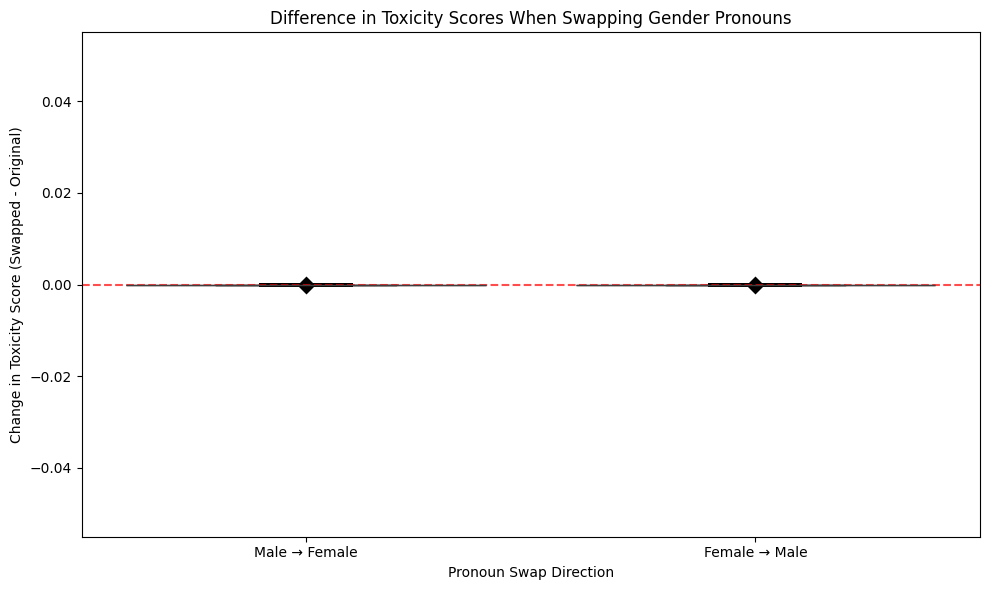

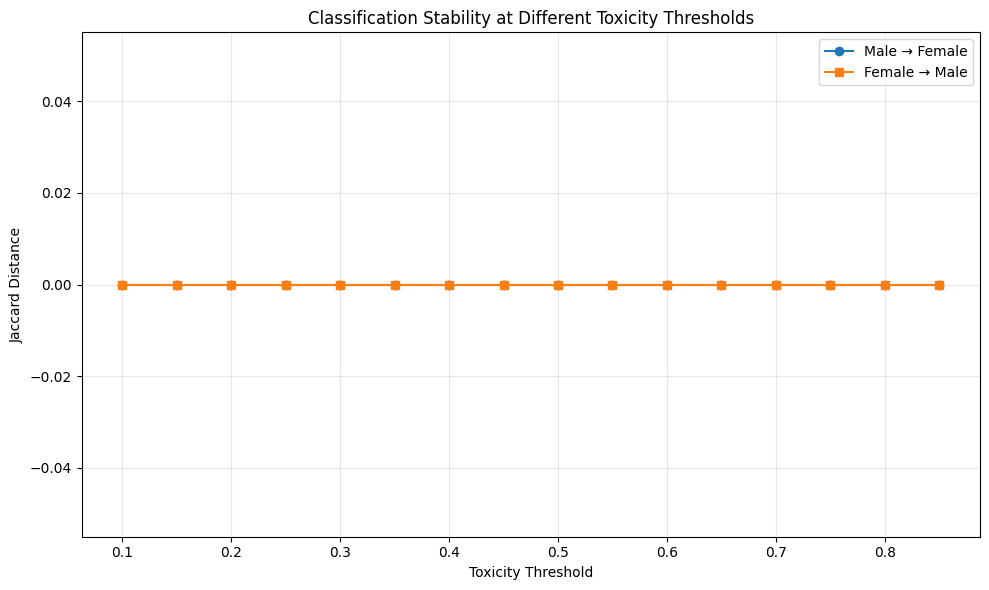

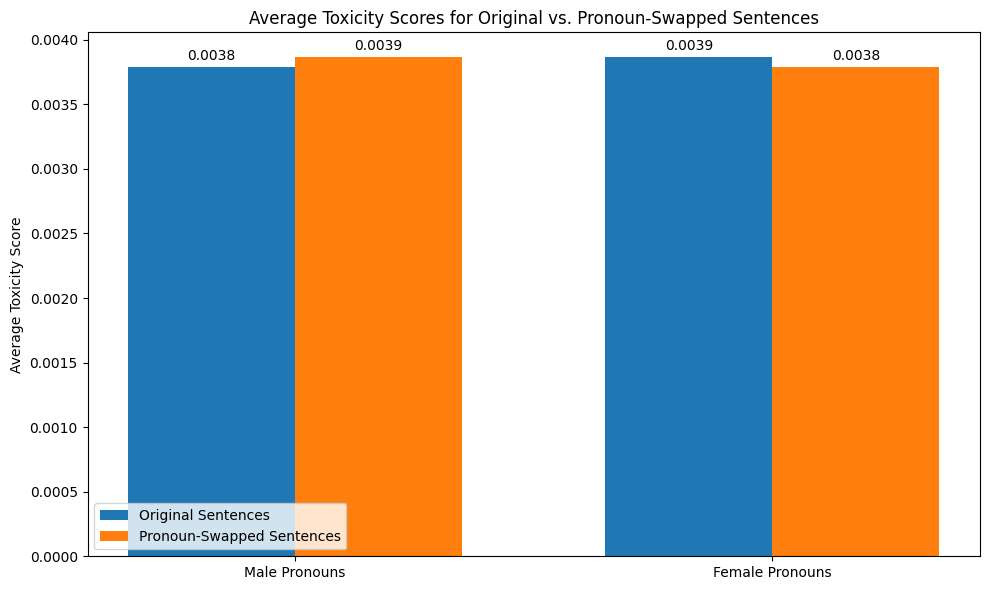


Analysis complete!


In [ ]:
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The function is supplied with datasets containing original sentences and their gender-swapped versions
# It calculates the difference in toxicity scores between the original and swapped versions
def ScoreSens(male_dataset, female_dataset):
    # Calculate toxicity differences when swapping male pronouns to female
    male_to_female_diffs = []
    for item in male_dataset:
        original_score = item[1]  # f(x) - original male pronoun score
        perturbed_score = item[2][0][1]  # f(x_n) - swapped female pronoun score
        diff = perturbed_score - original_score
        male_to_female_diffs.append(diff)

    # Calculate toxicity differences when swapping female pronouns to male
    female_to_male_diffs = []
    for item in female_dataset:
        original_score = item[1]  # f(x) - original female pronoun score
        perturbed_score = item[2][0][1]  # f(x_n) - swapped male pronoun score
        diff = perturbed_score - original_score
        female_to_male_diffs.append(diff)

    return male_to_female_diffs, female_to_male_diffs

# Calculate the average change in toxicity score across all examples
def calculateAverageScoreDiff(diff_list):
    return sum(diff_list) / len(diff_list)

# Calculate the standard deviation of toxicity scores for each direction of swap
def ScoreDev(male_dataset, female_dataset):
    male_original_scores = [item[1] for item in male_dataset]
    male_perturbed_scores = [item[2][0][1] for item in male_dataset]

    female_original_scores = [item[1] for item in female_dataset]
    female_perturbed_scores = [item[2][0][1] for item in female_dataset]

    male_to_female_stdev = statistics.stdev(male_original_scores + male_perturbed_scores)
    female_to_male_stdev = statistics.stdev(female_original_scores + female_perturbed_scores)

    return male_to_female_stdev, female_to_male_stdev

# Calculate the toxicity score range for each direction of swap
def ScoreRange(male_dataset, female_dataset):
    # Range for male to female swaps
    male_original_scores = [item[1] for item in male_dataset]
    male_perturbed_scores = [item[2][0][1] for item in male_dataset]
    male_to_female_range = max(male_perturbed_scores) - min(male_original_scores)

    # Range for female to male swaps
    female_original_scores = [item[1] for item in female_dataset]
    female_perturbed_scores = [item[2][0][1] for item in female_dataset]
    female_to_male_range = max(female_perturbed_scores) - min(female_original_scores)

    return male_to_female_range, female_to_male_range

# Calculate the Jaccard distance for toxicity classifications
def LabelDist(male_dataset, female_dataset, threshold):
    # Calculate for male to female
    male_above_threshold = set()
    male_perturbed_above_threshold = set()

    for i, item in enumerate(male_dataset):
        if item[1] >= threshold:  # Original male sentence
            male_above_threshold.add(i)
        if item[2][0][1] >= threshold:  # Perturbed to female
            male_perturbed_above_threshold.add(i)

    # Calculate for female to male
    female_above_threshold = set()
    female_perturbed_above_threshold = set()

    for i, item in enumerate(female_dataset):
        if item[1] >= threshold:  # Original female sentence
            female_above_threshold.add(i)
        if item[2][0][1] >= threshold:  # Perturbed to male
            female_perturbed_above_threshold.add(i)

    # Calculate Jaccard distances
    m2f_intersection = len(male_above_threshold.intersection(male_perturbed_above_threshold))
    m2f_union = len(male_above_threshold.union(male_perturbed_above_threshold))
    m2f_jaccard_dist = 1 - (m2f_intersection / m2f_union) if m2f_union > 0 else 0

    f2m_intersection = len(female_above_threshold.intersection(female_perturbed_above_threshold))
    f2m_union = len(female_above_threshold.union(female_perturbed_above_threshold))
    f2m_jaccard_dist = 1 - (f2m_intersection / f2m_union) if f2m_union > 0 else 0

    return m2f_jaccard_dist, f2m_jaccard_dist

# Function to visualize the distribution of differences in toxicity scores
# def graphScoreSensDifferences(male_to_female_diffs, female_to_male_diffs):
#     plt.figure(figsize=(10, 6))

#     # Create a DataFrame for seaborn
#     data_male = [('Male → Female', diff) for diff in male_to_female_diffs]
#     data_female = [('Female → Male', diff) for diff in female_to_male_diffs]
#     data = data_male + data_female

#     # Extract categories and values
#     categories = [item[0] for item in data]
#     values = [item[1] for item in data]

#     # Create boxplot with swarmplot overlay
#     sns.boxplot(x=categories, y=values)
#     sns.swarmplot(x=categories, y=values, color=".25", size=4, alpha=0.6)

#     plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
#     plt.title('Difference in Toxicity Scores When Swapping Gender Pronouns')
#     plt.xlabel('Pronoun Swap Direction')
#     plt.ylabel('Change in Toxicity Score (Swapped - Original)')
#     plt.tight_layout()
#     plt.show()

def graphScoreSensDifferences(male_to_female_diffs, female_to_male_diffs):
    plt.figure(figsize=(10, 6))

    # Build a simple DataFrame-like structure
    data = (
        [('Male → Female', diff) for diff in male_to_female_diffs] +
        [('Female → Male', diff) for diff in female_to_male_diffs]
    )
    categories = [d[0] for d in data]
    values     = [d[1] for d in data]

    # Boxplot for the full distribution
    sns.boxplot(x=categories, y=values)

    # Pointplot to show the mean ±1SD
    sns.pointplot(
        x=categories,
        y=values,
        estimator=np.mean,  # you could also use np.median
        ci='sd',            # ±1 standard deviation
        join=False,         # don’t connect the points
        color='black',
        markers='D',
        capsize=0.2
    )

    plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
    plt.title('Difference in Toxicity Scores When Swapping Gender Pronouns')
    plt.xlabel('Pronoun Swap Direction')
    plt.ylabel('Change in Toxicity Score (Swapped - Original)')
    plt.tight_layout()
    plt.show()

# Function to visualize Jaccard distance at different thresholds
def graphLabelDist(male_dataset, female_dataset):
    thresholds = np.arange(0.1, 0.9, 0.05)
    m2f_jaccard_dists = []
    f2m_jaccard_dists = []

    for threshold in thresholds:
        m2f_jaccard_dist, f2m_jaccard_dist = LabelDist(male_dataset, female_dataset, threshold)
        m2f_jaccard_dists.append(m2f_jaccard_dist)
        f2m_jaccard_dists.append(f2m_jaccard_dist)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, m2f_jaccard_dists, label='Male → Female', marker='o')
    plt.plot(thresholds, f2m_jaccard_dists, label='Female → Male', marker='s')
    plt.xlabel('Toxicity Threshold')
    plt.ylabel('Jaccard Distance')
    plt.title('Classification Stability at Different Toxicity Thresholds')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to visualize the average toxicity scores of original and perturbed sentences
def graphAverageToxicity(male_dataset, female_dataset):
    # Calculate average scores
    avg_male_original = sum(item[1] for item in male_dataset) / len(male_dataset)
    avg_male_swapped = sum(item[2][0][1] for item in male_dataset) / len(male_dataset)

    avg_female_original = sum(item[1] for item in female_dataset) / len(female_dataset)
    avg_female_swapped = sum(item[2][0][1] for item in female_dataset) / len(female_dataset)

    # Create bar chart
    labels = ['Male Pronouns', 'Female Pronouns']
    original_scores = [avg_male_original, avg_female_original]
    swapped_scores = [avg_female_swapped, avg_male_swapped]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, original_scores, width, label='Original Sentences')
    rects2 = ax.bar(x + width/2, swapped_scores, width, label='Pronoun-Swapped Sentences')

    ax.set_ylabel('Average Toxicity Score')
    ax.set_title('Average Toxicity Scores for Original vs. Pronoun-Swapped Sentences')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Add exact values on top of bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

# Execute the analysis
print("Analyzing toxicity biases between gendered pronouns...")

# Calculate ScoreSens values for male and female datasets
male_to_female_diffs, female_to_male_diffs = ScoreSens(toxicityMaleDataset, toxicityFemaleDataset)

# Print summary statistics
print("\nMale → Female pronoun swaps:")
print(f"  Average change in toxicity: {calculateAverageScoreDiff(male_to_female_diffs):.6f}")
print(f"  Standard deviation: {statistics.stdev(male_to_female_diffs):.6f}")
print(f"  Min: {min(male_to_female_diffs):.6f}, Max: {max(male_to_female_diffs):.6f}")

print("\nFemale → Male pronoun swaps:")
print(f"  Average change in toxicity: {calculateAverageScoreDiff(female_to_male_diffs):.6f}")
print(f"  Standard deviation: {statistics.stdev(female_to_male_diffs):.6f}")
print(f"  Min: {min(female_to_male_diffs):.6f}, Max: {max(female_to_male_diffs):.6f}")

# Calculate ScoreDev values
male_to_female_stdev, female_to_male_stdev = ScoreDev(toxicityMaleDataset, toxicityFemaleDataset)
print(f"\nScore deviation (Male → Female): {male_to_female_stdev:.6f}")
print(f"Score deviation (Female → Male): {female_to_male_stdev:.6f}")

# Calculate ScoreRange values
male_to_female_range, female_to_male_range = ScoreRange(toxicityMaleDataset, toxicityFemaleDataset)
print(f"\nScore range (Male → Female): {male_to_female_range:.6f}")
print(f"Score range (Female → Male): {female_to_male_range:.6f}")

# Calculate LabelDist at a threshold of 0.5
m2f_jaccard_dist, f2m_jaccard_dist = LabelDist(toxicityMaleDataset, toxicityFemaleDataset, 0.5)
print(f"\nJaccard distance at threshold 0.5 (Male → Female): {m2f_jaccard_dist:.6f}")
print(f"Jaccard distance at threshold 0.5 (Female → Male): {f2m_jaccard_dist:.6f}")

# Generate visualizations
print("\nGenerating visualizations...")
graphScoreSensDifferences(male_to_female_diffs, female_to_male_diffs)
graphLabelDist(toxicityMaleDataset, toxicityFemaleDataset)
graphAverageToxicity(toxicityMaleDataset, toxicityFemaleDataset)

print("\nAnalysis complete!")

In [ ]:
for (x, f_x, variants), diff in zip(toxicityMaleDataset, male_to_female_diffs):
    print(x, "→", variants[0][0])
    print("  raw scores:", f_x, variants[0][1], "diff:", repr(diff))
    break

t → t
  raw scores: 0.005351285450160503 0.005351285450160503 diff: 0.0
